In [1]:
pip install --upgrade yfinance pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\mshar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


**Question 1: Use yfinance to Extract Stock Data**

In [26]:
import yfinance as yf
tsla = yf.Ticker("TSLA")
tesla_data = tsla.history(period = "max")
# reset index
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


**Reset the index**

In [4]:
#2. inplace = False
# Returns a new DataFrame with the index reset and leaves the original DataFrame unchanged.
# By default inplace = false
tesla_data_reset = tesla_data.reset_index()
tesla_data_reset.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


**Question 2: Use Webscraping to Extract Tesla Revenue Data**

In [5]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
html_data[:500]

'\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\n    <head>\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\t<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />\n\t'

**Parse the html data using beautiful_soup**

In [6]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')
soup.prettify()[:500]

'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html class="no-js">\n <!--<![endif]-->\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>\n  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>\n  <title>\n   Te'

In [7]:
import pandas as pd
tables = soup.find_all('table')

# Extract the table with Tesla revenue (assuming it's the first table)
tesla_revenue_table = tables[1]

# Convert the HTML table to a DataFrame
tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]

# Rename columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']

# Display the DataFrame
tesla_revenue.head()

C:\Users\mshar\AppData\Local\Temp\ipykernel_18912\3915869497.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]


,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


**Remove comma and dollar sign from the 'Revenue' column**

In [8]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


**Remove an null or empty strings in the Revenue column.**

In [12]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [28]:
# question 2 complete
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
#Parse the html data using beautiful_soup
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')
import pandas as pd
tables = soup.find_all('table')
# Extract the table with Tesla revenue
tesla_revenue_table = tables[1]
tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]
# Rename columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']
# remove the comma and dollar sign
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
# remove an null or empty strings
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

C:\Users\mshar\AppData\Local\Temp\ipykernel_18912\2209204861.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]


,Date,Revenue
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


**Question 5: Plot Tesla Stock Graph**

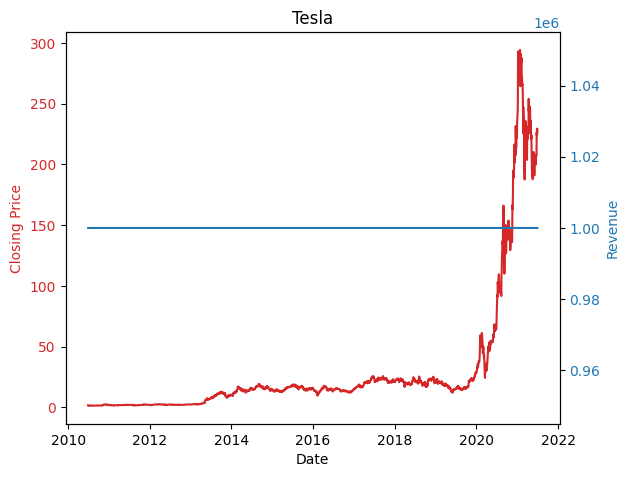

In [33]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
tsla = yf.Ticker("TSLA")
tesla_data = tsla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data = tesla_data[tesla_data['Date'] <= '2021-06-30']
tesla_revenue = pd.DataFrame({
    'Date': tesla_data['Date'], 
    'Revenue': [1000000] * len(tesla_data)  
})
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Closing Price', color=color)
    ax1.plot(stock_data['Date'], stock_data['Close'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Revenue', color=color)
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()
    plt.title(title)
    plt.show()
make_graph(tesla_data, tesla_revenue, 'Tesla')

**Question 3: Use yfinance to Extract Stock Data**

In [16]:
gme = yf.Ticker("GME")
gme_data = gme.history(period = 'max')
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [17]:
# reset index
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


**Question 4: Use Webscraping to Extract GME Revenue Data**

In [31]:
import requests

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
# Send a GET request to the URL
response = requests.get(url)

# Save the text content of the response as html_data
html_data = response.text

# Parse the html data using beautiful_soup
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

table = soup.find_all('table')[1]  
table_rows = table.find_all('tr')

data = []
for row in table_rows[1:]:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append({"Date": date, "Revenue": revenue})

gme_revenue = pd.DataFrame(data)

gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


**Question 6: Plot GameStop Stock Graph**

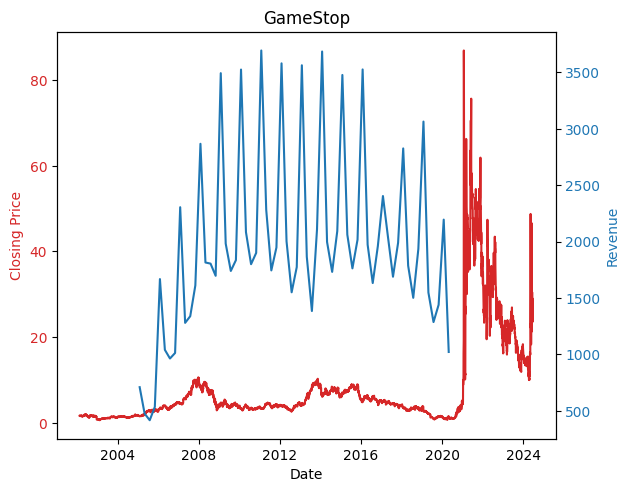

In [35]:
import matplotlib.pyplot as plt
from datetime import datetime
def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Closing Price', color=color)
    ax1.plot(stock_data['Date'], stock_data['Close'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Revenue', color=color)
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()  
    plt.title(title)
    plt.show()
make_graph(gme_data, gme_revenue, 'GameStop')